**NETWORK RECONSTRUCTION VIA THE MINIMUM DESCRIPTION LENGTH**

In [62]:
import sys
!{sys.executable} -m jupytext --to py MDL_UTILITY.ipynb

[jupytext] Reading MDL_UTILITY.ipynb in format ipynb
[jupytext] Updating the timestamp of MDL_UTILITY.py


In [63]:
import importlib, MDL_UTILITY
importlib.reload(MDL_UTILITY)
from MDL_UTILITY import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
import networkx as nx
import math
import graph_tool.all as gt

from joblib import Parallel, delayed
import os

In [87]:
rng = np.random.default_rng(rndm_seed)

In [3]:
def one_run(M, seed, network="Family"):
    beta=0.6
    lam=1
    rng_local = np.random.default_rng(seed)
    W_true, _ = build_network(network=network)
    X = build_data(W_true, M=M, beta=beta)
    N = W_true.shape[0]
    W_inf = np.zeros((N, N), dtype=float)
    state = W_state(X=X, W=W_inf, beta=beta,lam=lam)

    state, info = network_reconstruction(
        state, rng=rng_local, W_true=W_true,
        min_tries=3, max_tries=10, accepted_gain=1e-3,
        print_values=False
    )
    E = np.count_nonzero(np.abs(np.triu(state.W, k=1)) > state.tol)
    return info["Continuous_jaccard"], E

**FAMILY**

In [4]:
Ms = np.unique(np.logspace(np.log10(200), np.log10(20000), num=20).astype(int)).tolist()

In [5]:
%%time
Nr_medie = 5

Jaccards_family = []
Edges_family = []

n_jobs = min(os.cpu_count(), Nr_medie)  # qui massimo 3, perché hai 3 repliche

base_seed = 12345

for i, M in enumerate(Ms):
    print("Ciclo ", i + 1, "/", len(Ms))
    
    seeds = [base_seed + 1000*i + j for j in range(Nr_medie)]
    
    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(one_run)(M, s, network="Family") for s in seeds
    )
    J_list, E_list = zip(*results)
    Jaccards_family.append(float(np.mean(J_list)))
    Edges_family.append(float(np.mean(E_list)))
E_F = E_F = nx.florentine_families_graph().number_of_edges()
Edges_family = [e / E_F for e in Edges_family]

Ciclo  1 / 20


/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip pac

Ciclo  2 / 20
Ciclo  3 / 20
Ciclo  4 / 20
Ciclo  5 / 20
Ciclo  6 / 20
Ciclo  7 / 20
Ciclo  8 / 20
Ciclo  9 / 20
Ciclo  10 / 20
Ciclo  11 / 20
Ciclo  12 / 20
Ciclo  13 / 20
Ciclo  14 / 20
Ciclo  15 / 20
Ciclo  16 / 20
Ciclo  17 / 20
Ciclo  18 / 20
Ciclo  19 / 20
Ciclo  20 / 20
CPU times: user 1.26 s, sys: 601 ms, total: 1.86 s
Wall time: 13min 5s


**KARATE**

In [6]:
%%time
Nr_medie = 5

Jaccards_karate = []
Edges_karate = []

n_jobs = min(os.cpu_count(), Nr_medie)  # qui massimo 3, perché hai 3 repliche

base_seed = 12345

for i, M in enumerate(Ms):
    print("Ciclo ", i + 1, "/", len(Ms))
    
    seeds = [base_seed + 1000*i + j for j in range(Nr_medie)]
    
    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(one_run)(M, s, network="Karate") for s in seeds
    )
    J_list, E_list = zip(*results)
    Jaccards_karate.append(float(np.mean(J_list)))
    Edges_karate.append(float(np.mean(E_list)))
E_K = nx.karate_club_graph().number_of_edges()
Edges_karate = [e / E_K for e in Edges_karate]

Ciclo  1 / 20
Ciclo  2 / 20
Ciclo  3 / 20
Ciclo  4 / 20
Ciclo  5 / 20
Ciclo  6 / 20
Ciclo  7 / 20
Ciclo  8 / 20
Ciclo  9 / 20
Ciclo  10 / 20
Ciclo  11 / 20
Ciclo  12 / 20
Ciclo  13 / 20
Ciclo  14 / 20
Ciclo  15 / 20
Ciclo  16 / 20
Ciclo  17 / 20
Ciclo  18 / 20
Ciclo  19 / 20
Ciclo  20 / 20
CPU times: user 3.18 s, sys: 1.35 s, total: 4.53 s
Wall time: 28min 47s


**MISERABLE**

In [7]:
Ms_miserable = np.unique(np.logspace(np.log10(200), np.log10(20000), num=20).astype(int)).tolist()

In [8]:
%%time
Nr_medie = 5

Jaccards_miserable = []
Edges_miserable = []

n_jobs = min(os.cpu_count(), Nr_medie)  # qui massimo 3, perché hai 3 repliche

base_seed = 12345

for i, M in enumerate(Ms):
    print("Ciclo ", i + 1, "/", len(Ms))
    
    seeds = [base_seed + 1000*i + j for j in range(Nr_medie)]
    
    results = Parallel(n_jobs=n_jobs, backend="loky")(
        delayed(one_run)(M, s, network="Miserable") for s in seeds
    )
    J_list, E_list = zip(*results)
    Jaccards_miserable.append(float(np.mean(J_list)))
    Edges_miserable.append(float(np.mean(E_list)))
E_K = nx.les_miserables_graph().number_of_edges()
Edges_miserable = [e / E_K for e in Edges_miserable]

Ciclo  1 / 20
Ciclo  2 / 20
Ciclo  3 / 20
Ciclo  4 / 20
Ciclo  5 / 20
Ciclo  6 / 20
Ciclo  7 / 20
Ciclo  8 / 20
Ciclo  9 / 20
Ciclo  10 / 20
Ciclo  11 / 20
Ciclo  12 / 20
Ciclo  13 / 20
Ciclo  14 / 20
Ciclo  15 / 20
Ciclo  16 / 20
Ciclo  17 / 20
Ciclo  18 / 20
Ciclo  19 / 20
Ciclo  20 / 20
CPU times: user 9.98 s, sys: 4.14 s, total: 14.1 s
Wall time: 1h 10min 47s


**PLOTS**

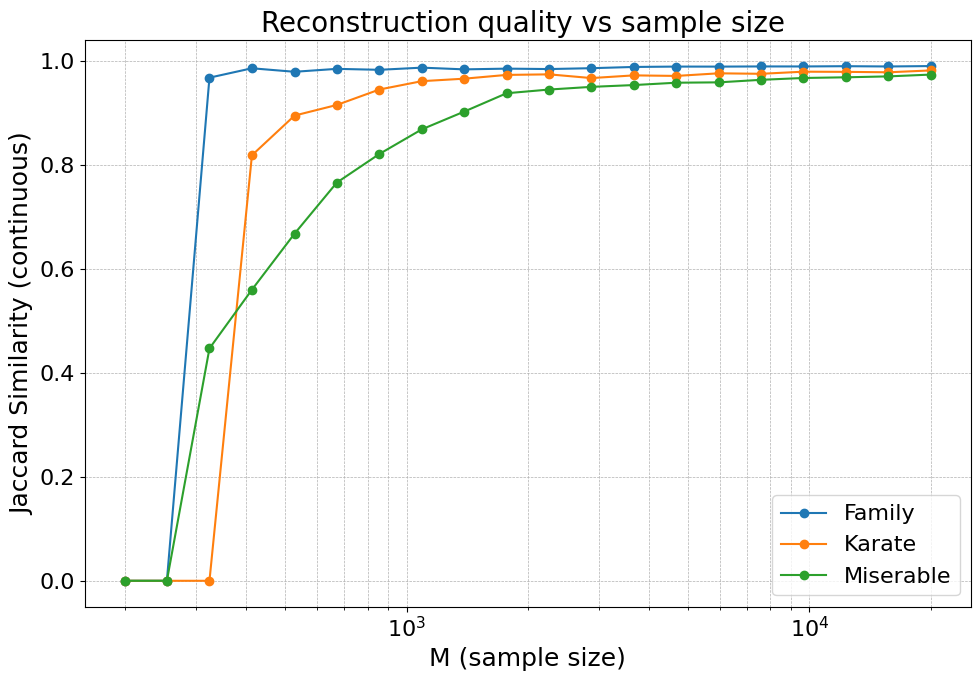

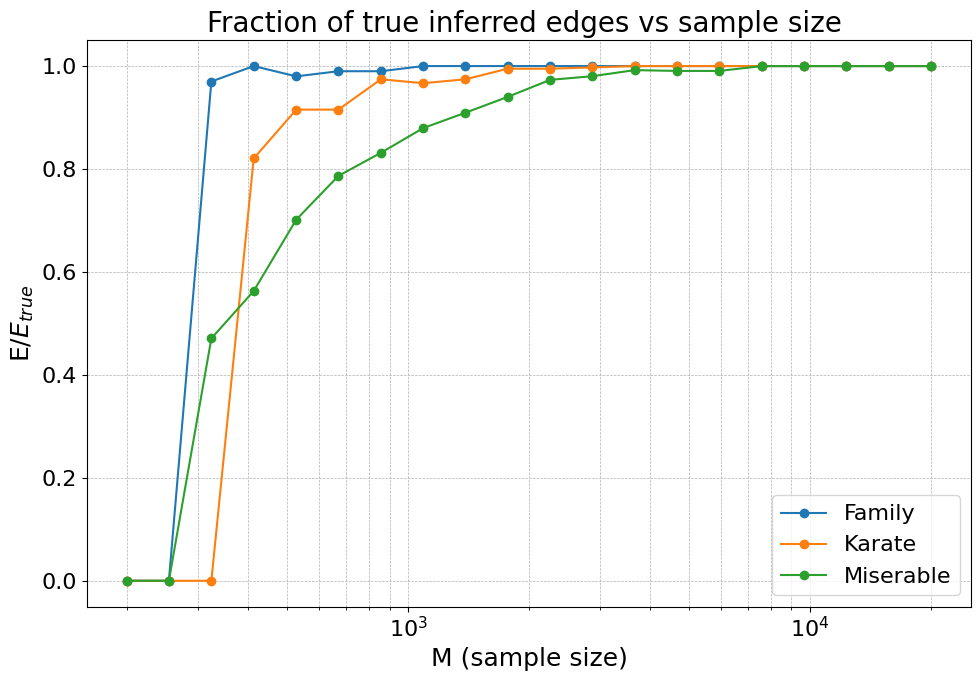

In [9]:
# SETTING SCRITTE PER PLOTS
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "legend.fontsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
})

# PLOT 1
mark_size = 12
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 13})

plt.plot(Ms, Jaccards_family, ".-", markersize=mark_size, label="Family")
plt.plot(Ms, Jaccards_karate, ".-", markersize=mark_size, label="Karate")
plt.plot(Ms_miserable, Jaccards_miserable, ".-", markersize=mark_size, label="Miserable")

ymin, ymax = plt.ylim()
dy = ymax - ymin

plt.legend(loc="lower right")
plt.xscale("log")
plt.xlabel("M (sample size)")
plt.ylabel("Jaccard Similarity (continuous)")
plt.title(f"Reconstruction quality vs sample size ")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("Jaccard_vs_M.png", dpi=300, bbox_inches='tight')
plt.show()

# PLOT 2
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 13})

plt.plot(Ms, Edges_family, ".-", markersize=mark_size, label="Family")
plt.plot(Ms, Edges_karate, ".-", markersize=mark_size, label="Karate")
plt.plot(Ms_miserable, Edges_miserable, ".-", markersize=mark_size, label="Miserable")

ymin, ymax = plt.ylim()
dy = ymax - ymin

plt.legend(loc="lower right")
plt.xscale("log")
plt.xlabel("M (sample size)")
plt.ylabel("E/$E_{true}$")
plt.title("Fraction of true inferred edges vs sample size ")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("Edges_vs_M.png", dpi=300, bbox_inches='tight')
plt.show()

In [71]:
# %%time
# rng_local = np.random.default_rng(12345)
# W_true, _ = build_network(network="Miserable")
# X = build_data(W_true, M=2000, beta=1)
# N = W_true.shape[0]
# W_inf = np.zeros((N, N), dtype=float)
# state = W_state(X=X, W=W_inf, beta=1)

# state, info = network_reconstruction(state, rng_local, W_true, max_tries=30, accepted_gain=1e-10)

Voglio vedere cosa cambia cambiando lamda e delta

In [10]:
def one_run_grid(M, seed, network="Family", lam=1.0, Delta=1e-8,
                 min_tries=3, max_tries=10, accepted_gain=1e-3):
    rng = np.random.default_rng(seed)

    W_true, _ = build_network(network=network)
    X = build_data(W_true, M=M, beta=1)
    N = W_true.shape[0]
    W_inf = np.zeros((N, N), dtype=float)

    state = W_state(X=X, W=W_inf, beta=1, lam=lam, Delta=Delta)

    state, info = network_reconstruction(
        state, rng=rng, W_true=W_true,
        min_tries=min_tries, max_tries=max_tries,
        accepted_gain=accepted_gain, print_values=False
    )

    E_rec = np.count_nonzero(np.abs(np.triu(state.W, k=1)) > state.tol)
    J = info["Continuous_jaccard"]
    return float(J), int(E_rec)

In [11]:
def grid_search_lam_delta(M, lambda_grid, delta_grid, network="Family"):
    info = []
    for ii, lam in enumerate(lambda_grid):
        print("lambda ", ii + 1, "/", len(lambda_grid))
        for jj, Delta in enumerate(delta_grid):
            print("\tdelta ", jj + 1, "/", len(delta_grid))
            seeds = [base_seed + 100000*ii + 1000*jj + r for r in range(Nr_medie)]

            results = Parallel(n_jobs=n_jobs, backend="loky")(
                delayed(one_run_grid)(M, s, network=network, lam=lam, Delta=Delta)
                for s in seeds
            )

            J_list, E_list = zip(*results)
            info.append({
                "lam": lam,
                "Delta": Delta,
                "J_mean": float(np.mean(J_list)),
                "J_std":  float(np.std(J_list, ddof=1)) if Nr_medie > 1 else 0.0,
                "E_mean": float(np.mean(E_list)),
                "E_std":  float(np.std(E_list, ddof=1)) if Nr_medie > 1 else 0.0,
            })


    return info

In [71]:
%%time
Nr_medie = 3

M = 2000
lambda_grid = np.logspace(-2, np.log10(20), num=10)
delta_grid  = np.logspace(-8, -3, num=5)

n_jobs = min(os.cpu_count(), Nr_medie)

Jaccards_grid = []
base_seed = 12345

info = grid_search_lam_delta(M, lambda_grid, delta_grid, network="Family")

lambda  1 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  2 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  3 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  4 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  5 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  6 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  7 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  8 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  9 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
lambda  10 / 10
	delta  1 / 5
	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
	delta  5 / 5
CPU times: user 1.52 s, sys: 678 ms, total: 2.2 s
Wall time: 21min 31s


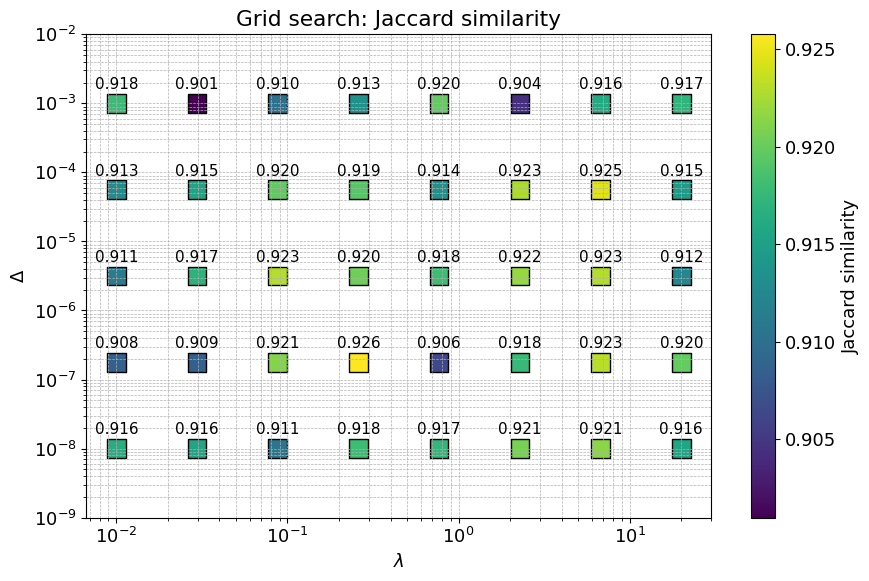

In [88]:
lams   = np.array([d["lam"] for d in info], dtype=float)
deltas = np.array([d["Delta"] for d in info], dtype=float)
J      = np.array([d["J_mean"] for d in info], dtype=float)

plt.figure(figsize=(9, 6))
plt.rcParams.update({'font.size': 13})

sc = plt.scatter(lams, deltas, c=J, s=180, marker="s", edgecolors="k")

# Scrive il valore sopra ogni punto
for x, y, val in zip(lams, deltas, J):
    plt.annotate(f"{val:.3f}", (x, y),
                 textcoords="offset points", xytext=(0, 8),  # 8 punti sopra
                 ha="center", va="bottom",
                 fontsize=11, color="black")

x_min, x_max = lams.min(), lams.max()
y_min, y_max = deltas.min(), deltas.max()
delta_scale_x = 1.5
delta_scale_y = 10
plt.xlim(x_min / delta_scale_x, x_max * delta_scale_x)
plt.ylim(y_min / delta_scale_y, y_max * delta_scale_y)


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\Delta$")
plt.title("Grid search: Jaccard similarity")

cbar = plt.colorbar(sc)
cbar.set_label("Jaccard similarity")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("Grid_search_family.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
%%time
Nr_medie = 3

M = 2000
lambda_grid = np.logspace(-2, np.log10(20), num=8)
delta_grid  = np.logspace(-8, -3, num=5)

n_jobs = min(os.cpu_count(), Nr_medie)

Jaccards_grid = []
base_seed = 12345

info = grid_search_lam_delta(M, lambda_grid, delta_grid, network="Karate")

lambda  1 / 8
	delta  1 / 5


/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ftanesini/venvs/gt/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip pac

	delta  2 / 5
	delta  3 / 5
	delta  4 / 5
CPU times: user 239 ms, sys: 35.1 ms, total: 274 ms
Wall time: 2min 4s


KeyboardInterrupt: 

In [ ]:
lams   = np.array([d["lam"] for d in info], dtype=float)
deltas = np.array([d["Delta"] for d in info], dtype=float)
J      = np.array([d["J_mean"] for d in info], dtype=float)

plt.figure(figsize=(9, 6))
plt.rcParams.update({'font.size': 13})

sc = plt.scatter(lams, deltas, c=J, s=180, marker="s", edgecolors="k")

# Scrive il valore sopra ogni punto
for x, y, val in zip(lams, deltas, J):
    plt.annotate(f"{val:.3f}", (x, y),
                 textcoords="offset points", xytext=(0, 8),  # 8 punti sopra
                 ha="center", va="bottom",
                 fontsize=11, color="black")

x_min, x_max = lams.min(), lams.max()
y_min, y_max = deltas.min(), deltas.max()
delta_scale_x = 1.5
delta_scale_y = 10
plt.xlim(x_min / delta_scale_x, x_max * delta_scale_x)
plt.ylim(y_min / delta_scale_y, y_max * delta_scale_y)


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\Delta$")
plt.title("Grid search: Jaccard similarity")

cbar = plt.colorbar(sc)
cbar.set_label("Jaccard similarity")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("Grid_search_Karate.png", dpi=300, bbox_inches='tight')
plt.show()

In [99]:
seed1 = 237062
beta = 0.7
W_true, E = build_network(seed=seed1, network="Miserable")
X = build_data(W_true, M=3000, beta=beta)
rng = np.random.default_rng(seed1)

N = X.shape[0]

print(N, E, N / (2 * E))
W_inf = np.zeros((N, N), dtype=float)
state_football = W_state(X=X, W=W_inf, beta=beta, lam = 0.1)

77 254 0.1515748031496063


In [100]:
%%time
state_football, info = network_reconstruction(state_football, rng, W_true, max_tries=15)

Cambiamenti fatti
92
Jacc similarity binarizzata:  0.30000000000000004
Jaccard similarity continua:  0.2633720761929824
Cambiamenti fatti
180
Jacc similarity binarizzata:  0.5116279069767442
Jaccard similarity continua:  0.4548567134731636
JcCont - JcCont_old:  0.2258727588044218
Cambiamenti fatti
300
Jacc similarity binarizzata:  0.7621359223300971
Jaccard similarity continua:  0.6807294722775854
JcCont - JcCont_old:  0.1272458033490158
Cambiamenti fatti
400
Jacc similarity binarizzata:  0.8736141906873615
Jaccard similarity continua:  0.8079752756266012
JcCont - JcCont_old:  0.059665350266933204
Cambiamenti fatti
410
Jacc similarity binarizzata:  0.923728813559322
Jaccard similarity continua:  0.8676406258935344
JcCont - JcCont_old:  0.026840208964561185
Cambiamenti fatti
338
Jacc similarity binarizzata:  0.94824016563147
Jaccard similarity continua:  0.8944808348580956
JcCont - JcCont_old:  0.01777994177440767
Cambiamenti fatti
262
Jacc similarity binarizzata:  0.963265306122449
Jac

In [101]:
iup, jup = np.triu_indices_from(state_football.W, k=1)
w = state_football.W[iup, jup]
w_active = w[np.abs(w) > state_football.tol]
print("media, std pesi: ", w_active.mean(), w_active.std())

media, std pesi:  0.14947760425101214 0.013380049872758799


In [102]:
A_true = (np.abs(np.triu(W_true, 1)) > state_football.tol)
A_inf  = (np.abs(np.triu(state_football.W, 1)) > state_football.tol)

N = W_true.shape[0]
B = N*(N-1)//2

TP = np.sum(A_true & A_inf)
FP = np.sum((~A_true) & A_inf)
FN = np.sum(A_true & (~A_inf))
TN = B - TP - FP - FN

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1        = 2*precision*recall / (precision + recall)

print("TP,FP,FN:", TP, FP, FN)
print("accuracy:", accuracy, "precision:", precision, "recall:", recall, "f1:", f1)

TP,FP,FN: 247 0 7
accuracy: 0.9976076555023924 precision: 1.0 recall: 0.9724409448818898 f1: 0.9860279441117765


In [103]:
print("edge non zero:",
      np.sum(np.abs(np.triu(state_football.W,1)) > state_football.tol))
print("categorie z:",
      len(state_football.z_vals))


edge non zero: 247
categorie z: 16
